# Импорт библиотек

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(15,8)})

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import train_test_split

# Знакомство с данными

In [3]:
data= pd.read_csv('autos.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


Описание данных: 

    DateCrawled - дата получения данных
    Price - стоимость авто
    VehicleType - тип авто
    RegistrationYear - год регистрации авто
    Gearbox - коробка передач
    Power - мощность двигателя
    Model - модель авто
    Kilometer - пробег авто
    RegistrationMonth - месяц регистрации авто
    FuelType - тип топлива
    Brand - марка авто
    NotRepaired - было ли авто в ремонте
    DateCreated - дата создания объявления
    NumberOfPictures - количество фотографий авто
    PostalCode - почтовый индекс
    LastSeen - дата последнего просмотра объявления

In [6]:
data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [7]:
data.isnull().sum() #проверка на пропущенные значения

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [11]:
dataset = data.dropna(subset=["Model", "NotRepaired", "VehicleType", "Gearbox", "FuelType"])
dataset.info()
#удаляем строки с пропущенными значениями

<class 'pandas.core.frame.DataFrame'>
Index: 245814 entries, 3 to 354367
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        245814 non-null  object
 1   Price              245814 non-null  int64 
 2   VehicleType        245814 non-null  object
 3   RegistrationYear   245814 non-null  int64 
 4   Gearbox            245814 non-null  object
 5   Power              245814 non-null  int64 
 6   Model              245814 non-null  object
 7   Kilometer          245814 non-null  int64 
 8   RegistrationMonth  245814 non-null  int64 
 9   FuelType           245814 non-null  object
 10  Brand              245814 non-null  object
 11  NotRepaired        245814 non-null  object
 12  DateCreated        245814 non-null  object
 13  NumberOfPictures   245814 non-null  int64 
 14  PostalCode         245814 non-null  int64 
 15  LastSeen           245814 non-null  object
dtypes: int64(7), object(9)
me

In [12]:
dataset.isnull().sum() #проверка на то, что в датасете нет нулевых значений

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64

In [13]:
dataset.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58


In [5]:
data.drop('LastSeen', axis =1, inplace = True)
data.drop('NumberOfPictures', axis =1, inplace = True)
data.drop('PostalCode', axis =1, inplace = True)


In [6]:
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00


In [8]:
data.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645
std,4514.158514,90.227958,189.850405,37905.341530,3.726421
min,0.000000,1000.000000,0.000000,5000.000000,0.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000


In [9]:
data.describe(include=['object', 'bool'])

,DateCrawled,VehicleType,Gearbox,Model,FuelType,Brand,NotRepaired,DateCreated
count,354369,316879,334536,334664,321474,354369,283215,354369
unique,271174,8,2,250,7,40,2,109
top,2016-03-24 14:49:47,sedan,manual,golf,petrol,volkswagen,no,2016-04-03 00:00:00
freq,7,91457,268251,29232,216352,77013,247161,13719


In [10]:
data['VehicleType'].value_counts()

VehicleType
sedan          91457
small          79831
wagon          65166
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: count, dtype: int64

In [11]:
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0


In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354344 entries, 0 to 354368
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354344 non-null  object
 1   Price              354344 non-null  int64 
 2   VehicleType        316854 non-null  object
 3   RegistrationYear   354344 non-null  int64 
 4   Gearbox            334511 non-null  object
 5   Power              354344 non-null  int64 
 6   Model              334639 non-null  object
 7   Kilometer          354344 non-null  int64 
 8   RegistrationMonth  354344 non-null  int64 
 9   FuelType           321449 non-null  object
 10  Brand              354344 non-null  object
 11  NotRepaired        283190 non-null  object
 12  DateCreated        354344 non-null  object
dtypes: int64(5), object(8)
memory usage: 37.8+ MB


In [14]:
data.Price.fillna(0.0, inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354344 entries, 0 to 354368
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354344 non-null  object
 1   Price              354344 non-null  int64 
 2   VehicleType        316854 non-null  object
 3   RegistrationYear   354344 non-null  int64 
 4   Gearbox            334511 non-null  object
 5   Power              354344 non-null  int64 
 6   Model              334639 non-null  object
 7   Kilometer          354344 non-null  int64 
 8   RegistrationMonth  354344 non-null  int64 
 9   FuelType           321449 non-null  object
 10  Brand              354344 non-null  object
 11  NotRepaired        283190 non-null  object
 12  DateCreated        354344 non-null  object
 13  NumberOfPictures   354344 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 40.6+ MB


In [22]:
data.sort_values(by='Price', 
        ascending=False).head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated
320429,2016-03-22 20:57:59,20000,sedan,2011,auto,265,c_klasse,50000,11,gasoline,mercedes_benz,no,2016-03-22 00:00:00
287250,2016-03-30 12:50:57,20000,bus,2012,auto,0,other,40000,1,petrol,nissan,NaN,2016-03-30 00:00:00
11325,2016-03-25 18:50:35,20000,suv,2008,auto,290,cayenne,125000,3,petrol,porsche,no,2016-03-25 00:00:00
57942,2016-03-10 13:53:09,20000,sedan,2011,auto,265,c_klasse,50000,11,gasoline,mercedes_benz,no,2016-03-10 00:00:00
27502,2016-03-31 12:59:07,20000,coupe,2008,manual,265,a5,150000,10,petrol,audi,no,2016-03-31 00:00:00


In [19]:
data[data['Price'] == max('Price')]['Kilometer'].mean()

nan

In [21]:
data.DateCreated=pd.to_datetime(data.DateCreated)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354344 entries, 0 to 354368
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        354344 non-null  object        
 1   Price              354344 non-null  int64         
 2   VehicleType        316854 non-null  object        
 3   RegistrationYear   354344 non-null  int64         
 4   Gearbox            334511 non-null  object        
 5   Power              354344 non-null  int64         
 6   Model              334639 non-null  object        
 7   Kilometer          354344 non-null  int64         
 8   RegistrationMonth  354344 non-null  int64         
 9   FuelType           321449 non-null  object        
 10  Brand              354344 non-null  object        
 11  NotRepaired        283190 non-null  object        
 12  DateCreated        354344 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(7)
memory 

# Визуализация и анализ данных

In [15]:
car_pivot = pd.pivot_table(data, 'Price',['Brand'],aggfunc=np.mean)
car_pivot

C:\Users\Виктория\AppData\Local\Temp\ipykernel_3276\2502414632.py:1: FutureWarning: The provided callable <function mean at 0x000001FA84AAEDC0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  car_pivot = pd.pivot_table(data, 'Price',['Brand'],aggfunc=np.mean)


,Price
Brand,
alfa_romeo,3697.622731
audi,6239.962587
bmw,6162.264088
chevrolet,5639.312429
chrysler,3707.160640
citroen,3467.194639
dacia,5839.654444
daewoo,1017.811808
daihatsu,1693.656328


<Axes: xlabel='Brand', ylabel='Price'>

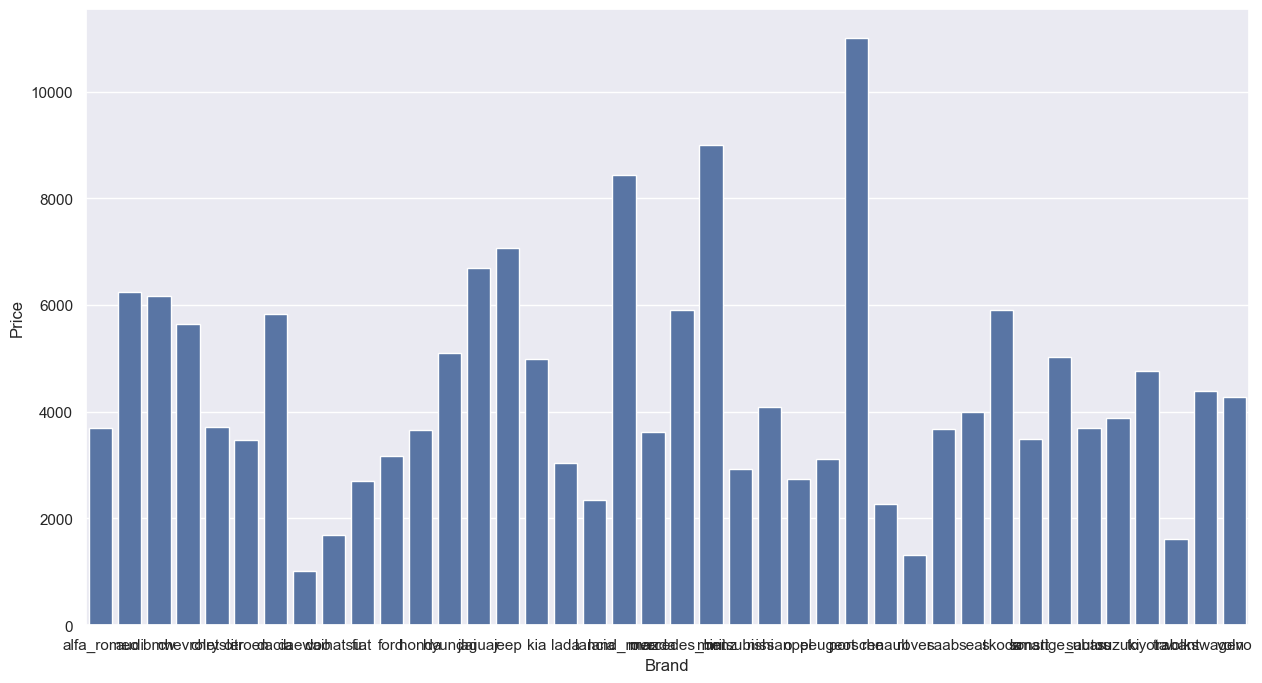

In [17]:
sns.barplot(data=car_pivot, x='Brand', y='Price')

In [22]:
car_pivot = pd.pivot_table(data, 'Price',['VehicleType'],aggfunc=np.mean)
car_pivot

C:\Users\Виктория\AppData\Local\Temp\ipykernel_3276\2785715435.py:1: FutureWarning: The provided callable <function mean at 0x000001FA84AAEDC0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  car_pivot = pd.pivot_table(data, 'Price',['VehicleType'],aggfunc=np.mean)


,Price
VehicleType,
bus,5487.071347
convertible,6807.014305
coupe,6011.409296
other,3562.032248
sedan,4722.607073
small,2677.543557
suv,9009.432430
wagon,4880.098559


<Axes: xlabel='VehicleType', ylabel='Price'>

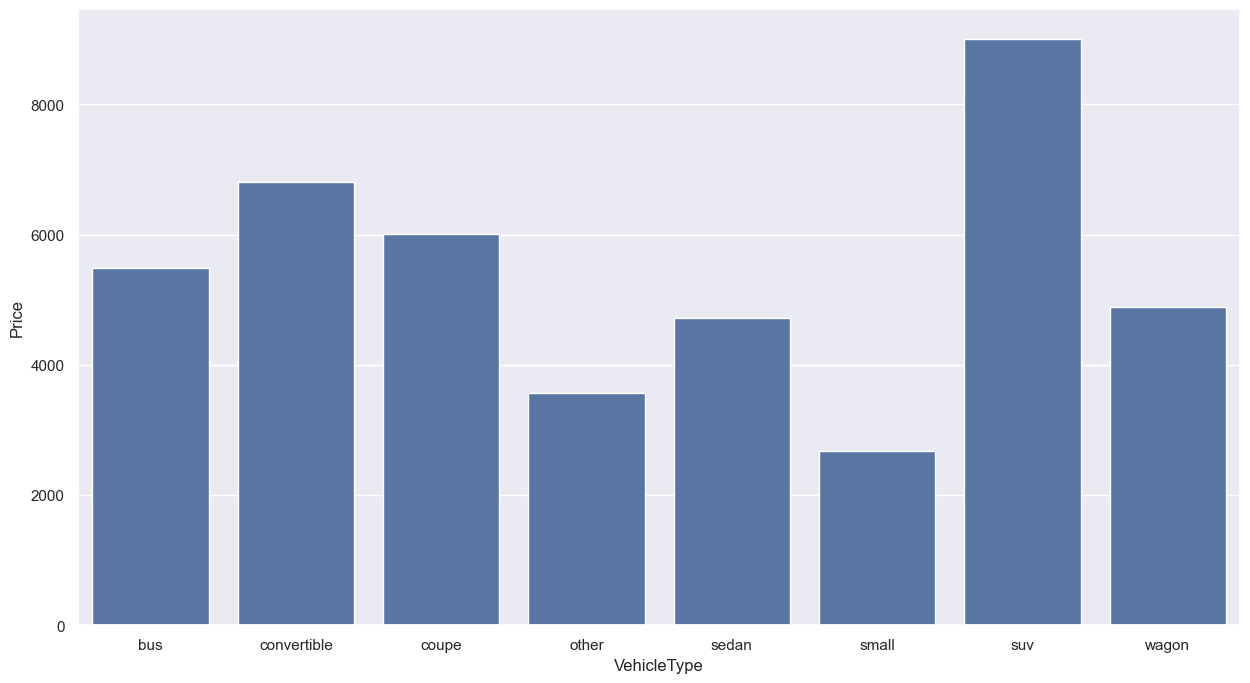

In [23]:
sns.barplot(data=car_pivot, x='VehicleType', y='Price')

In [25]:
agg_price = data.groupby('VehicleType').agg({'Price':'mean','Kilometer':'mean'}).reset_index()
agg_price

,VehicleType,Price,Kilometer
0,bus,5487.071347,131880.278019
1,convertible,6807.014305,118427.956244
2,coupe,6011.409296,129546.017206
3,other,3562.032248,122692.424703
4,sedan,4722.607073,130966.189914
5,small,2677.543557,119434.707990
6,suv,9009.432430,121569.820759
7,wagon,4880.098559,138278.595436


<Axes: xlabel='VehicleType', ylabel='Price'>

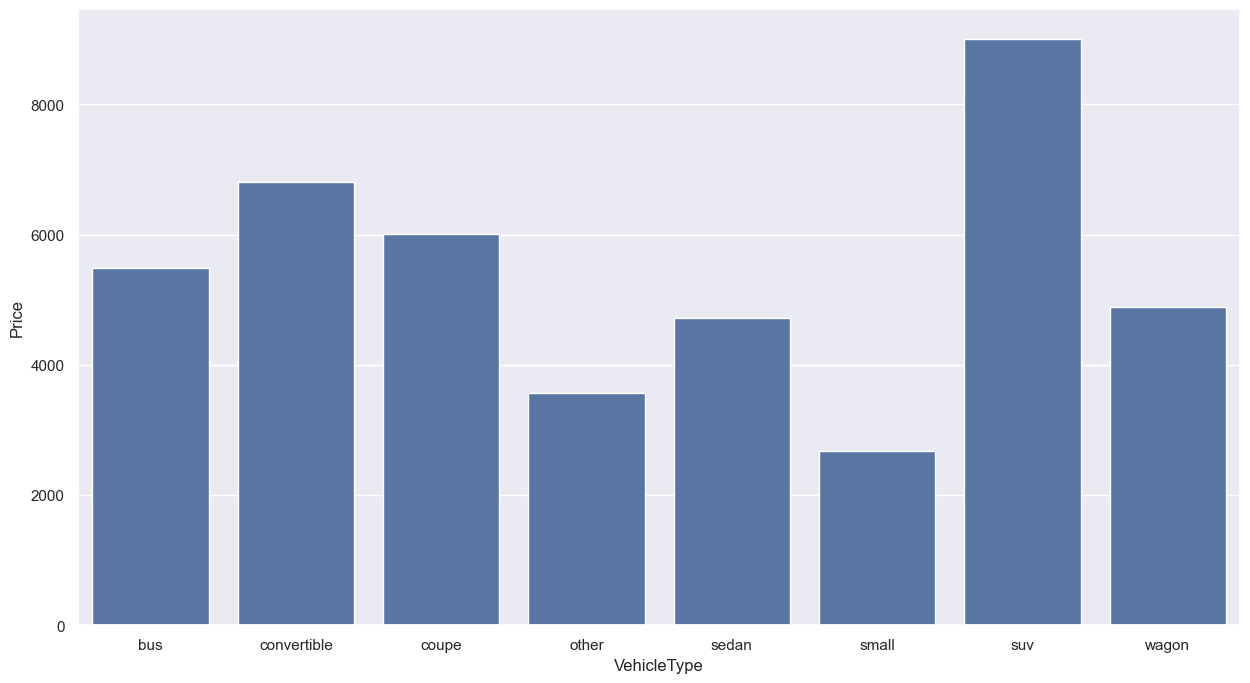

In [26]:
sns.barplot(data=agg_price, x='VehicleType', y='Price')

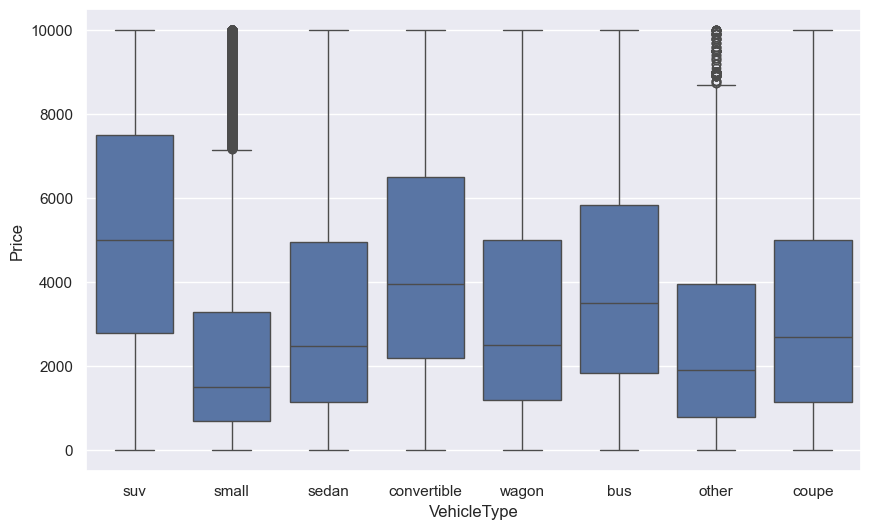

In [29]:
g = data[data.Price <10000]
plt.figure(figsize=(10,6))
sns.boxplot(y="Price",x="VehicleType",data =g);